In [1]:
import numpy as np

In [13]:
import matplotlib
import matplotlib.pyplot as plt
# "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 10})

In [2]:
# Inputs 
Mux = np.array([324054, 8.2e-4, 29.19])
Sigx = np.array([32405.4, 8.2e-5, 5.838])
# The MPF point calculated from the FORM
Mpfx = np.array([2.7264e+05, 6.8990e-04, 4.0440e+01])
Mpfxp = (Mpfx - Mux) / Sigx
L = 6.1

In [4]:
# Calculate the a/w vector
Partialgxp = Sigx * np.array([Mpfx[1], Mpfx[0], -(L*L/8)])
Normpartialgxp = np.sqrt(np.sum(Partialgxp*Partialgxp))
W = Partialgxp/Normpartialgxp

In [5]:
W

array([ 0.53642387,  0.53642374, -0.65153588])

In [9]:
# Perform MCS to visualize the failure and safety domain
# Set the sample size to be equal to the that of the PAC MCS 
N = 10078792

In [11]:
def visualizereliability(mux, sigx, l, w, n):
    # Initialize variables
    normw = np.sqrt(np.sum(w*w))
    safev1 = []
    safev2 = []
    failurev1 = []
    failurev2 = []
    for i in range(n):
        # Sample
        x1 = np.random.normal(loc=mux[0], scale=sigx[0], size=1)[0]
        x2 = np.random.normal(loc=mux[1], scale=sigx[1], size=1)[0]
        x3 = np.random.normal(loc=mux[2], scale=sigx[2], size=1)[0]
        # Transfer the variables into (r, alpha) space
        # First transfer to reduced space
        xp = (np.array([x1, x2, x3]) - mux) / sigx
        # v1
        v1 = np.sqrt(np.sum(xp*xp))
        # v2
        v2 = np.sum(xp*w)/(v1*normw)
        # Check if failure occurs
        state = 0
        if x1*x2-(x3*l*l/8) < 0:
            failurev1.append(v1)
            failurev2.append(v2)
        else:
            safev1.append(v1)
            safev2.append(v2)
    return safev1, safev2, failurev1, failurev2  

In [12]:
Safev1, Safev2, Failurev1, Failurev2 = visualizereliability(Mux, Sigx, L, W, N)

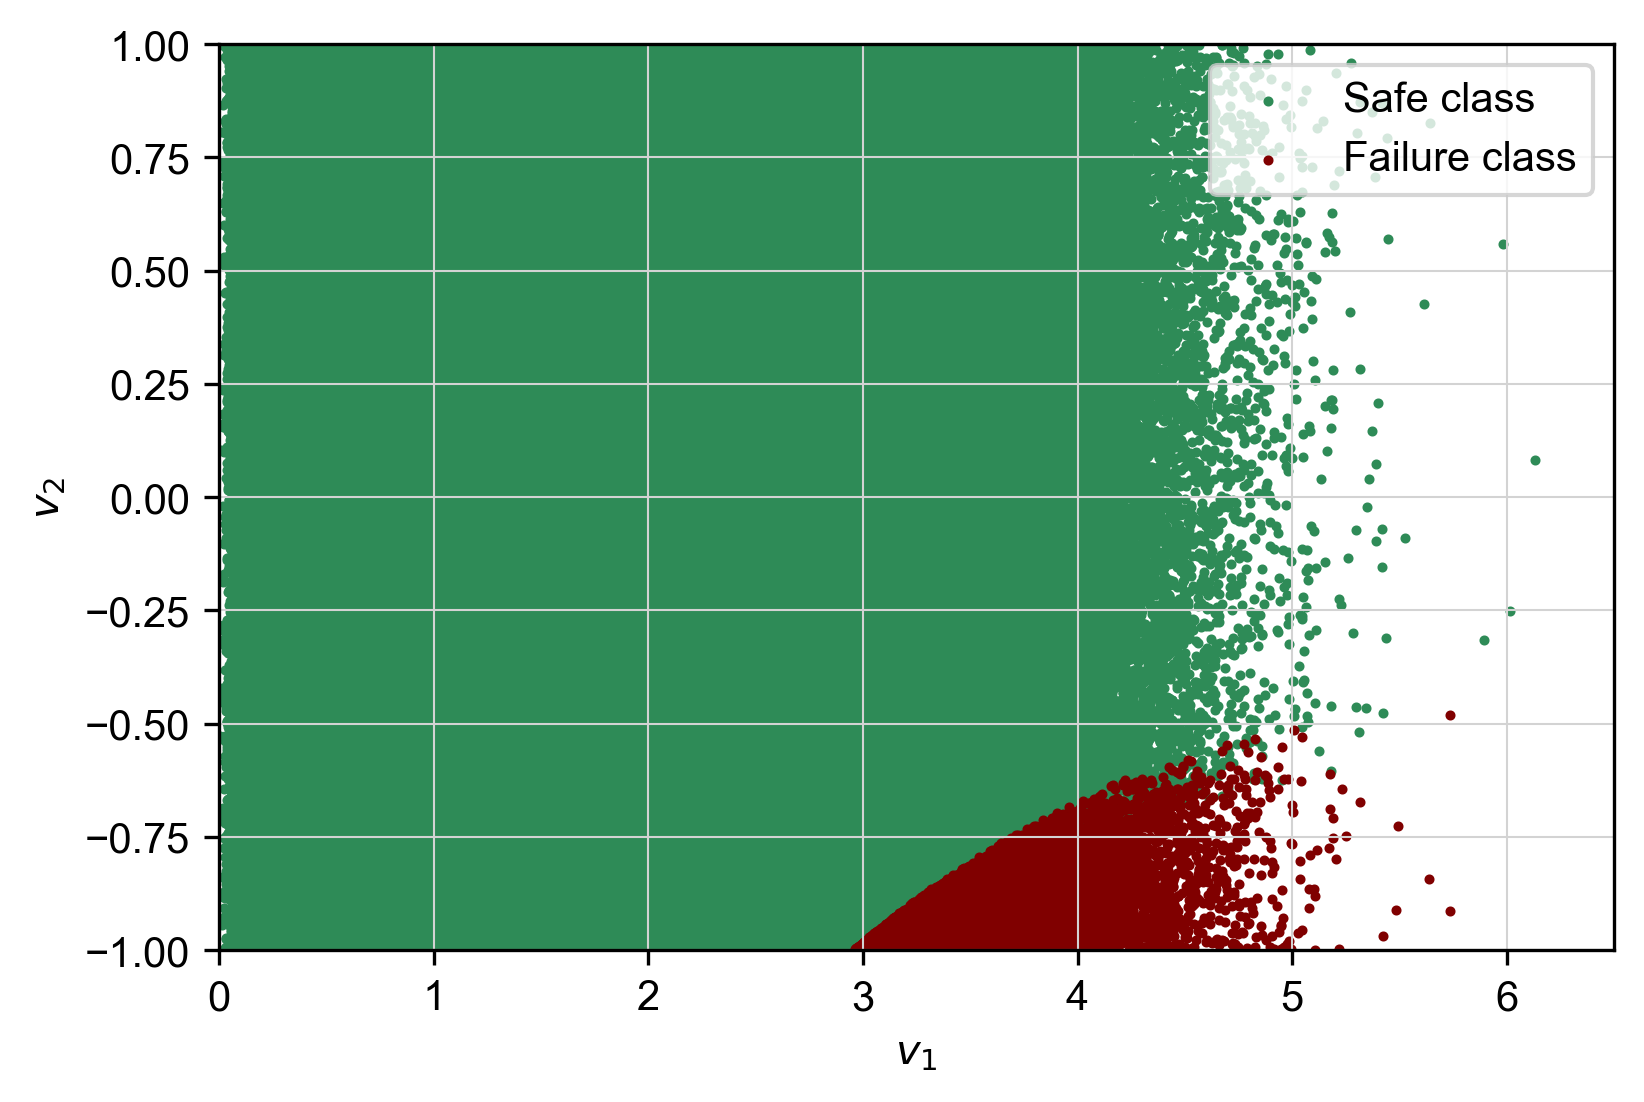

In [18]:
# Visualize correlation between basic statistics
plt.scatter(Safev1, Safev2, s=2, c='seagreen', label='Safe class')
plt.scatter(Failurev1, Failurev2, s=2, c='maroon', label='Failure class')
plt.grid(color='lightgray', linewidth=0.5)
plt.xlim(0, 6.5)
plt.ylim(-1, 1)
plt.legend(loc='upper right')
plt.xlabel('$v_1$')
plt.ylabel('$v_2$')
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"%s.jpg"%('Reliability plot'), bbox_inches='tight')
plt.show()